In [1]:
require(dplyr)
require(tidyr)
#library(tidyverse)
library(DESeq2)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    d

In [2]:
filenames3 <- dir()
# 通过正则，获取所有xlsx结尾的文件名
filenames4 <- grep('\\.csv', filenames3, value = TRUE)
prove<-unique(filenames4)
# 初始化数据框，用于后面的数据合并
data4 <- data.frame()
filenames4

[1] "0806.top100can.type2specific.csv" "circRNAannotation2-exo.csv"      
 [3] "H1.csv"                           "H2.csv"                          
 [5] "H5.csv"                           "H7.csv"                          
 [7] "Q3.csv"                           "Q5.csv"                          
 [9] "Q8.csv"                           "Q9.csv"                          
[11] "SRR5712482.1.csv"                 "SRR5712483.1.csv"                
[13] "SRR5712484.1.csv"                 "SRR5712485.1.csv"                
[15] "SRR5712486.1.csv"                 "SRR5712487.1.csv"                
[17] "SRR5712488.1.csv"                 "SRR5712489.1.csv"                
[19] "SRR5712490.1.csv"                 "SRR5712491.1.csv"                
[21] "SRR5712492.1.csv"                 "SRR5712493.1.csv"                
[23] "SRR5712494.1.csv"                 "SRR5712495.1.csv"                
[25] "SRR5712496.1.csv"                 "SRR5712497.1.csv"                
[27] "SRR5712498.1.csv"                 "SRR5712499.1.csv"                
[29] "SRR5712500.1.csv"                 "SRR5712501.1.csv"                
[31] "SRR5712502.1.csv"                 "SRR5712503.1.csv"                
[33] "SRR5712504.1.csv"                 "SRR5712505.1.csv"                
[35] "SRR5712506.1.csv"                 "SRR5712507.1.csv"                
[37] "SRR5712508.1.csv"                 "SRR5712509.1.csv"                
[39] "SRR5712510.1.csv"                 "SRR5712511.1.csv"                
[41] "SRR5712512.1.csv"                 "SRR5712513.1.csv"

In [3]:
length(filenames4)

[1] 42

In [4]:
filenames4<-filenames4[3:42]

In [5]:
filenames4

[1] "H1.csv"           "H2.csv"           "H5.csv"           "H7.csv"          
 [5] "Q3.csv"           "Q5.csv"           "Q8.csv"           "Q9.csv"          
 [9] "SRR5712482.1.csv" "SRR5712483.1.csv" "SRR5712484.1.csv" "SRR5712485.1.csv"
[13] "SRR5712486.1.csv" "SRR5712487.1.csv" "SRR5712488.1.csv" "SRR5712489.1.csv"
[17] "SRR5712490.1.csv" "SRR5712491.1.csv" "SRR5712492.1.csv" "SRR5712493.1.csv"
[21] "SRR5712494.1.csv" "SRR5712495.1.csv" "SRR5712496.1.csv" "SRR5712497.1.csv"
[25] "SRR5712498.1.csv" "SRR5712499.1.csv" "SRR5712500.1.csv" "SRR5712501.1.csv"
[29] "SRR5712502.1.csv" "SRR5712503.1.csv" "SRR5712504.1.csv" "SRR5712505.1.csv"
[33] "SRR5712506.1.csv" "SRR5712507.1.csv" "SRR5712508.1.csv" "SRR5712509.1.csv"
[37] "SRR5712510.1.csv" "SRR5712511.1.csv" "SRR5712512.1.csv" "SRR5712513.1.csv"

In [6]:
filenames4<-filenames4[-c(2,8)]

In [7]:
filenames4

[1] "H1.csv"           "H5.csv"           "H7.csv"           "Q3.csv"          
 [5] "Q5.csv"           "Q8.csv"           "SRR5712482.1.csv" "SRR5712483.1.csv"
 [9] "SRR5712484.1.csv" "SRR5712485.1.csv" "SRR5712486.1.csv" "SRR5712487.1.csv"
[13] "SRR5712488.1.csv" "SRR5712489.1.csv" "SRR5712490.1.csv" "SRR5712491.1.csv"
[17] "SRR5712492.1.csv" "SRR5712493.1.csv" "SRR5712494.1.csv" "SRR5712495.1.csv"
[21] "SRR5712496.1.csv" "SRR5712497.1.csv" "SRR5712498.1.csv" "SRR5712499.1.csv"
[25] "SRR5712500.1.csv" "SRR5712501.1.csv" "SRR5712502.1.csv" "SRR5712503.1.csv"
[29] "SRR5712504.1.csv" "SRR5712505.1.csv" "SRR5712506.1.csv" "SRR5712507.1.csv"
[33] "SRR5712508.1.csv" "SRR5712509.1.csv" "SRR5712510.1.csv" "SRR5712511.1.csv"
[37] "SRR5712512.1.csv" "SRR5712513.1.csv"

In [8]:
temp<-read.csv(filenames4[1],header=T)
temp
temp2<-temp[,c(1,8)]

X,circfind,CIRI,findcirc,circexp,sum,count,result
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
chr1_100275598_100277316_+,0,69,66,0,2,135,67.50000
chr1_100424221_100442996_+,0,25,4,0,2,29,14.50000
chr1_100494817_100499262_+,0,82,84,42,3,208,69.33333
chr1_100906851_100921841_+,0,253,62,68,3,383,127.66667
chr1_10095460_10105744_+,0,105,109,101,3,315,105.00000
chr1_10134987_10137205_+,0,67,129,0,2,196,98.00000
chr1_10327677_10334638_+,62,64,0,0,2,126,63.00000
chr1_103527694_103541475_+,0,10,20,0,2,30,15.00000
chr1_10403070_10404279_+,0,79,74,0,2,153,76.50000


In [9]:
#count of single circRNA max: 1000
temp2$result<-round(temp2$result)
temp2<-temp2[which(temp2$result<1000),]
colnames(temp2)<-c("circRNA",filenames4[1])
data4 <- temp2

In [10]:
for (i in 2:38){
  temp<-read.csv(filenames4[i],header=T)
  temp
  temp2<-temp[,c(1,8)]
  temp2$result<-round(temp2$result)
  temp2<-temp2[which(temp2$result<1000),]
  colnames(temp2)<-c("circRNA",filenames4[i])
  data4 <- merge(data4,temp2,all=T)
}

In [11]:
data4[is.na(data4)]<-0
data4

circRNA,H1.csv,H5.csv,H7.csv,Q3.csv,Q5.csv,Q8.csv,SRR5712482.1.csv,SRR5712483.1.csv,SRR5712484.1.csv,⋯,SRR5712504.1.csv,SRR5712505.1.csv,SRR5712506.1.csv,SRR5712507.1.csv,SRR5712508.1.csv,SRR5712509.1.csv,SRR5712510.1.csv,SRR5712511.1.csv,SRR5712512.1.csv,SRR5712513.1.csv
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_100007033_100017815_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100011364_100017815_+,0,8,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100043072_100061949_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100049908_100061949_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,5,0,0
chr1_100049908_100069685_+,0,0,12,0,0,0,0,0,0,⋯,0,2,0,0,0,0,0,0,0,0
chr1_100049908_100080659_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100058665_100061949_+,0,0,0,0,0,0,14,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_100059877_100061949_+,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
chr1_10007569_10008274_+,0,0,0,0,0,0,11,0,8,⋯,0,0,0,0,0,24,0,6,2,0


In [12]:
rownames(data4)<-data4$circRNA
data4$circRNA<-NULL

In [13]:
temp0<-read.csv(filenames4[1],header=T)
dim(temp0)
temp0$result<-round(temp0$result)
temp0<-temp0[which(temp0$result<1000),]
dim(temp0)
temp0<-temp0[,c(2,3,4,5)]
see<-rowSums(as.matrix(temp0)>0)
count<-as.data.frame(table(see))

[1] 2440    8

[1] 2438    8

In [14]:
colnames(count)<-c("algorithms","freq")
count$freq<-count$freq/sum(count$freq)
count$label<-filenames4[1]
count

algorithms,freq,label
<fct>,<dbl>,<chr>
2,0.60992617,H1.csv
3,0.31583265,H1.csv
4,0.07424118,H1.csv


In [15]:
for (i in 2:38){
temp<-read.csv(filenames4[i],header=T)
temp$result<-round(temp$result)
temp<-temp[which(temp$result<1000),]
temp<-temp[,c(2,3,4,5)]
see<-rowSums(as.matrix(temp)>0)
see<-as.data.frame(table(see))
colnames(see)<-c("algorithms","freq")
see$freq<-see$freq/sum(see$freq)
see$label<-filenames4[i]
count<-rbind(count,see)
}

In [16]:
count

algorithms,freq,label
<fct>,<dbl>,<chr>
2,0.609926169,H1.csv
3,0.315832650,H1.csv
4,0.074241181,H1.csv
2,0.526985835,H5.csv
3,0.342298727,H5.csv
4,0.130715438,H5.csv
2,0.578564257,H7.csv
3,0.356425703,H7.csv
4,0.065010040,H7.csv


In [17]:
options(repr.plot.height=5,repr.plot.width=5)

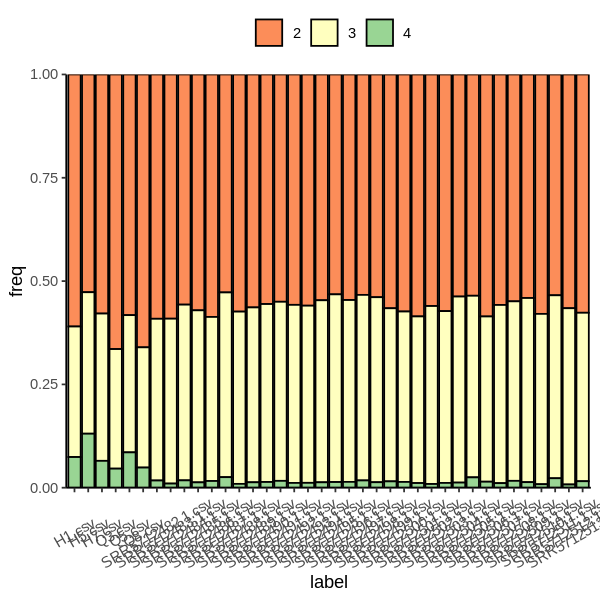

In [19]:
library(ggplot2)
ggplot(count, aes(x=label,y=freq,fill=algorithms)) +
  geom_bar(stat="identity",color="black") +
  scale_y_continuous(expand=c(0,0))+
 scale_fill_brewer(palette = "Spectral")+
  theme_classic()+
theme(legend.position = "top",axis.text.x = element_text(angle = 30, hjust = 0.5, vjust = 0.5))+
 guides(fill=guide_legend(title=NULL))
ggsave("0725-algorithmcapture3-exo.pdf",width=7,height=7)

In [20]:
know2<-t(data4)
know2

,chr1_100007033_100017815_+,chr1_100011364_100017815_+,chr1_100043072_100061949_+,chr1_100049908_100061949_+,chr1_100049908_100069685_+,chr1_100049908_100080659_+,chr1_100058665_100061949_+,chr1_100059877_100061949_+,chr1_10007569_10008274_+,chr1_10007569_10008379_+,⋯,chrY_20507351_20524440_-,chrY_20588023_20589575_+,chrY_2951637_2953997_+,chrY_2953908_2961646_+,chrY_2961073_2961646_+,chrY_2975094_2976822_+,chrY_361404_362332_-,chrY_7341114_7367433_+,chrY_7341114_7371889_+,chrY_7367355_7371889_+
H1.csv,0,0,0,0,0,0,0,0,0,0,⋯,0,77,0,194,66,0,0,0,0,118
H5.csv,0,8,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
H7.csv,0,0,0,0,12,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Q3.csv,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Q5.csv,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Q8.csv,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SRR5712482.1.csv,0,0,0,0,0,0,14,0,11,0,⋯,0,0,0,11,0,0,0,0,0,0
SRR5712483.1.csv,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SRR5712484.1.csv,0,0,0,0,0,0,0,0,8,0,⋯,5,0,0,43,0,0,0,0,0,0
SRR5712485.1.csv,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [21]:
know2<-as.data.frame(know2)

In [22]:
rownames(know2)

[1] "H1.csv"           "H5.csv"           "H7.csv"           "Q3.csv"          
 [5] "Q5.csv"           "Q8.csv"           "SRR5712482.1.csv" "SRR5712483.1.csv"
 [9] "SRR5712484.1.csv" "SRR5712485.1.csv" "SRR5712486.1.csv" "SRR5712487.1.csv"
[13] "SRR5712488.1.csv" "SRR5712489.1.csv" "SRR5712490.1.csv" "SRR5712491.1.csv"
[17] "SRR5712492.1.csv" "SRR5712493.1.csv" "SRR5712494.1.csv" "SRR5712495.1.csv"
[21] "SRR5712496.1.csv" "SRR5712497.1.csv" "SRR5712498.1.csv" "SRR5712499.1.csv"
[25] "SRR5712500.1.csv" "SRR5712501.1.csv" "SRR5712502.1.csv" "SRR5712503.1.csv"
[29] "SRR5712504.1.csv" "SRR5712505.1.csv" "SRR5712506.1.csv" "SRR5712507.1.csv"
[33] "SRR5712508.1.csv" "SRR5712509.1.csv" "SRR5712510.1.csv" "SRR5712511.1.csv"
[37] "SRR5712512.1.csv" "SRR5712513.1.csv"

In [23]:
know2$type<-c(rep('ICC',times=6),rep('healthy',times=32))

In [24]:
cleancan<-know2[which(know2$type=="ICC"),]
cleannor<-know2[which(know2$type=="healthy"),]

In [25]:
cleannor$type<-NULL
cleancan$type<-NULL

In [26]:
cleannor<-cleannor[which(rowSums(cleannor)>0),]
cleannor<-cleannor[,which(colSums(cleannor)>0)]

In [27]:
cleancan<-cleancan[which(rowSums(cleancan)>0),]
cleancan<-cleancan[,which(colSums(cleancan)>0)]

In [28]:
dim(cleancan)
dim(cleannor)

[1]     6 11752

[1]    32 54545

In [29]:
library(VennDiagram)
input<-list(colnames(cleancan),colnames(cleannor))
Table<-calculate.overlap(input)
pdf("0725-venncirc-exo.pdf",width=6,height=6)
venn<-venn.diagram(input,NULL, main.cex = 3,
category = c("circRNA_ICC","circRNA_healthy"),fill = c("tomato","turquoise"),
cat.col= c("tomato","turquoise"), imagetype = "tiff",  main.fontfamily="serif") #, filename = "Vennup.tif"
grid.draw(venn)
dev.off()

Loading required package: grid

Loading required package: futile.logger



png 
  2

In [30]:
cleancan<-as.data.frame(table(colSums(as.matrix(cleancan)>0)))
cleannor<-as.data.frame(table(colSums(as.matrix(cleannor)>0)))

In [31]:
cleancan
cleannor

Var1,Freq
<fct>,<int>
1,8199
2,1773
3,818
4,465
5,307
6,190


Var1,Freq
<fct>,<int>
1,29297
2,7950
3,4207
4,2566
5,1819
6,1412
7,1069
8,884
9,651


In [32]:
cleancan$tag<-"ICC"
cleannor$tag<-"healthy"

In [33]:
cleancannor<-rbind(cleancan,cleannor)

In [34]:
cleancannor$logFreq<-log10(cleancannor$Freq)
cleancannor

Var1,Freq,tag,logFreq
<fct>,<int>,<chr>,<dbl>
1,8199,ICC,3.913761
2,1773,ICC,3.248709
3,818,ICC,2.912753
4,465,ICC,2.667453
5,307,ICC,2.487138
6,190,ICC,2.278754
1,29297,healthy,4.466823
2,7950,healthy,3.900367
3,4207,healthy,3.623973


In [35]:
cleancan<-know2[which(know2$type=="ICC"),]
cleannor<-know2[which(know2$type=="healthy"),]

In [36]:
cleannor$type<-NULL
cleancan$type<-NULL

In [37]:
densitycan<-as.data.frame(rowSums(cleancan))
densitynor<-as.data.frame(rowSums(cleannor))
densitycan$tag<-"ICC"
densitynor$tag<-"healthy"
colnames(densitycan)<-c("Totalcount","Tag")
colnames(densitynor)<-c("Totalcount","Tag")
density<-rbind(densitycan,densitynor)
density

,Totalcount,Tag
,<dbl>,<chr>
H1.csv,239935,ICC
H5.csv,144911,ICC
H7.csv,198558,ICC
Q3.csv,167628,ICC
Q5.csv,96917,ICC
Q8.csv,119817,ICC
SRR5712482.1.csv,93264,healthy
SRR5712483.1.csv,95661,healthy
SRR5712484.1.csv,176013,healthy


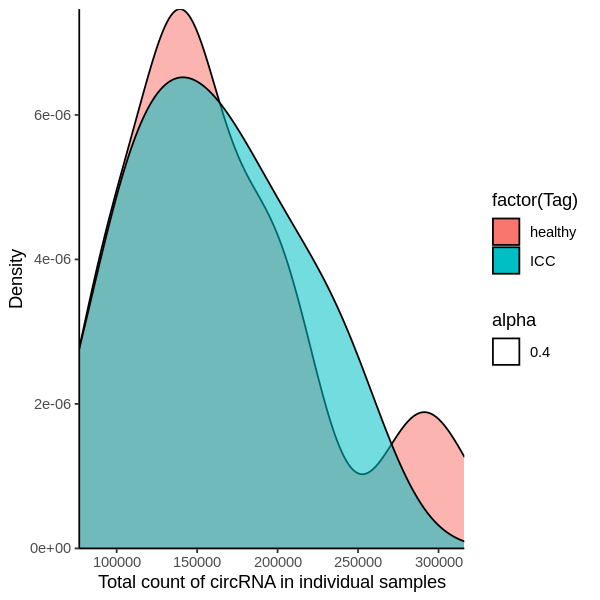

In [38]:
library("ggplot2")
ggplot(data=density,aes(x=Totalcount,fill=factor(Tag),alpha=0.4))+
geom_density(stat="density")+
scale_x_continuous(name="Total count of circRNA in individual samples",expand=c(0,0))+
scale_y_continuous(name="Density",expand=c(0,0))+
theme_classic()
ggsave("0725-circdensity-exo.pdf",width=6,height=5)

In [39]:
dim(data4)

[1] 57433    38

In [40]:
circlist<-rownames(data4)

In [41]:
write.table(circlist,file="0725_data4_circlist-exo.txt",quote=FALSE,row.names=FALSE)

In [43]:
circanno<-read.table(file="0725_data4_circlist_exo_out.bed")
dim(circanno)

[1] 74290    10

In [44]:
circanno

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
<chr>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>
chr1,100007033,100017815,+,chr1,99969789,100026979,ENSG00000117620.11,ENSG00000117620.11,+
chr1,100011364,100017815,+,chr1,99969789,100026979,ENSG00000117620.11,ENSG00000117620.11,+
chr1,100043072,100061949,+,chr1,100038097,100083377,ENSG00000156875.12,ENSG00000156875.12,+
chr1,100043072,100061949,+,chr1,100057990,100084471,ENSG00000241073.1,ENSG00000241073.1,-
chr1,100049908,100061949,+,chr1,100038097,100083377,ENSG00000156875.12,ENSG00000156875.12,+
chr1,100049908,100061949,+,chr1,100057990,100084471,ENSG00000241073.1,ENSG00000241073.1,-
chr1,100049908,100069685,+,chr1,100038097,100083377,ENSG00000156875.12,ENSG00000156875.12,+
chr1,100049908,100069685,+,chr1,100057990,100084471,ENSG00000241073.1,ENSG00000241073.1,-
chr1,100049908,100080659,+,chr1,100038097,100083377,ENSG00000156875.12,ENSG00000156875.12,+


In [45]:
table(circanno$V8==circanno$V9)


 TRUE 
74290 

In [46]:
#circanno2<-circanno[which(circanno$V4==circanno$V10),]
circanno2<-circanno
circanno2<-circanno2[,c(1,2,3,4,8,10)]

In [47]:
circanno2$circRNA<-paste(circanno2$V1,circanno2$V2,circanno2$V3,circanno2$V4,sep="_")

In [48]:
circanno2$strand<-paste(circanno2$V4,circanno2$V10,sep="_")

In [49]:
circanno2<-circanno2[,c(7,5,8)]

In [50]:
load(file = "gtf_df.Rda")
require(dplyr)
require(tidyr)

In [51]:
expr_df_nopoint <- circanno2 %>% 
 tidyr::separate(V8,into = c("gene_id","drop"),sep="\\.") %>% 
   dplyr::select(-drop)

expr_df<- gtf_df %>% 
  dplyr::filter(type=="gene",gene_biotype=="protein_coding") %>% #筛选gene,和编码指标
  dplyr::select(c(gene_name,gene_id,gene_biotype)) %>% 
  dplyr::inner_join(expr_df_nopoint ,by ="gene_id") %>% 
  dplyr::select(-c(gene_id,gene_biotype))

In [52]:
expr_df
length(unique(expr_df$circRNA))

gene_name,circRNA,strand
<chr>,<chr>,<chr>
SDF4,chr1_1223243_1223968_-,-_-
UBE2J2,chr1_1256991_1257310_-,-_-
UBE2J2,chr1_1262268_1263386_-,-_-
MMP23B,chr1_1649498_1655484_-,-_+
CDK11B,chr1_1649498_1655484_-,-_-
CDK11B,chr1_1712263_1716478_-,-_-
CDK11A,chr1_1712263_1716478_-,-_-
NADK,chr1_1755373_1756343_-,-_-
NADK,chr1_1779904_1825499_-,-_-


[1] 55532

In [53]:
know2<-t(data4)

In [54]:
dim(know2)

[1]    38 57433

In [55]:
type<-c(rep('ICC',times=6),rep('healthy',times=32))

In [56]:
type<-as.data.frame(type)
colnames(type)<-"type"
know2<-cbind(know2,type)

In [57]:
data.frame(know2$type,rownames(know2))

know2.type,rownames.know2.
<chr>,<chr>
ICC,H1.csv
ICC,H5.csv
ICC,H7.csv
ICC,Q3.csv
ICC,Q5.csv
ICC,Q8.csv
healthy,SRR5712482.1.csv
healthy,SRR5712483.1.csv
healthy,SRR5712484.1.csv


In [58]:
cleancan<-know2[which(know2$type=="ICC"),]
cleannor<-know2[which(know2$type=="healthy"),]

In [59]:
cleannor$type<-NULL
cleancan$type<-NULL

In [60]:
dim(cleancan)
dim(cleannor)

[1]     6 57433

[1]    32 57433

In [61]:
cleannor<-cleannor[which(rowSums(cleannor)>0),]
cleannor<-cleannor[,which(colSums(cleannor)>0)]

In [62]:
cleancan<-cleancan[which(rowSums(cleancan)>0),]
cleancan<-cleancan[,which(colSums(cleancan)>0)]

In [63]:
cleancancirc<-as.data.frame(colnames(cleancan))
colnames(cleancancirc)<-"circRNA"

In [64]:
cleannorcirc<-as.data.frame(colnames(cleannor))
colnames(cleannorcirc)<-"circRNA"

In [65]:
cleancangene<-merge(expr_df,cleancancirc)
cleannorgene<-merge(expr_df,cleannorcirc)

In [66]:
freqcan<-as.data.frame(table(cleancangene$gene_name))

In [67]:
freqnor<-as.data.frame(table(cleannorgene$gene_name))

In [68]:
sum(freqcan$Freq)
sum(freqnor$Freq)

[1] 12081

[1] 56036

In [69]:
freqcan$Freq2<-freqcan$Freq/12081

In [70]:
freqnor$Freq2<-freqnor$Freq/56036

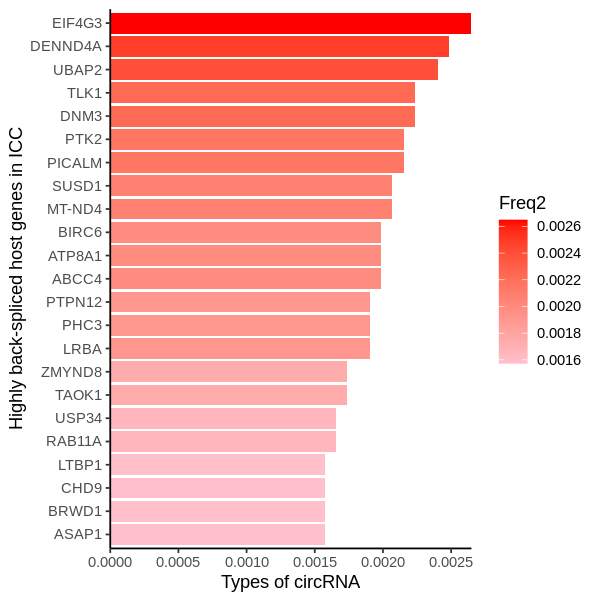

In [71]:
library(ggplot2)
freqcan2<-freqcan[which(freqcan$Freq2>0.0015),]
ggplot(freqcan2,aes(x= reorder(Var1,Freq2), y=Freq2,fill=Freq2)) +                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
  geom_bar(stat = "identity") +
  coord_flip()+
  scale_fill_gradient(low = "pink", high = "red")+
  xlab("Highly back-spliced host genes in ICC") +
  scale_y_continuous(name="Types of circRNA",expand=c(0,0))+
  theme_classic()
ggsave("1007-topsplicedICC-exo.pdf",width=6,height=6)

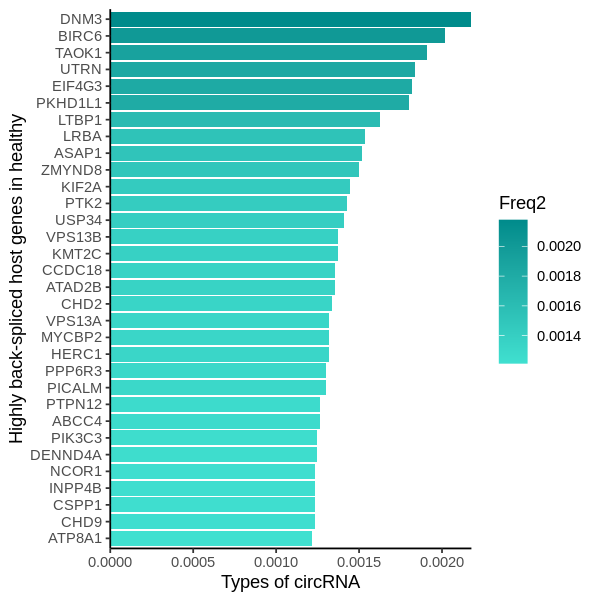

In [72]:
freqnor2<-freqnor[which(freqnor$Freq2>0.0012),]
ggplot(freqnor2,aes(x= reorder(Var1,Freq2), y=Freq2,fill=Freq2)) +                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
  geom_bar(stat = "identity") +
  coord_flip()+
  scale_fill_gradient(low = "turquoise", high = "cyan4")+
  xlab("Highly back-spliced host genes in healthy") +
  scale_y_continuous(name="Types of circRNA",expand=c(0,0))+
  theme_classic()
ggsave("1007-topsplicednormal.pdf",width=6,height=6)

In [73]:
table(cleancangene$strand)
table(cleannorgene$strand)


 -_-  -_+  +_-  +_+ 
5624  369  304 5784 


  -_-   -_+   +_-   +_+ 
26288  1167  1263 27318 

In [74]:
library(VennDiagram)
input<-list(freqcan$Var1,freqnor$Var1)
Table<-calculate.overlap(input)
pdf("0725-vennbackspliced_exo.pdf",width=6,height=6)
venn<-venn.diagram(input,NULL, main.cex = 3,
category = c("Spliced_genes_ICC","Spliced_genes_healthy"),fill = c("tomato","steelblue"),
cat.col= c("tomato","steelblue"),   imagetype = "tiff",  main.fontfamily="serif") #, filename = "Vennup.tif"
grid.draw(venn)
dev.off()

png 
  2

In [75]:
write.csv(expr_df,file='circRNAannotation2-exo.csv')